In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import numpy as np

import utils.windFarms as wfman
from utils.networks import GraphNeuralNet as GNN
from utils.graphNetHelpers import graph2inputs
from utils.testUtils import test_direction, test_speed, test_speed_direction, pprint_graph, test_turbine_numbers

import torch

In [3]:
angle_threshold = 90

In [4]:
x_grid_size = 1000
y_grid_size = 1000
base_config_path = '../configs/example_input_JK100.json'
update_config_path = '../configs/update_floris_configs.json'
single_input_path = '../configs/example_input_single.json'
min_distance_factor = 2.0

wind_farm_man = wfman.RandomSampleManager(x_grid_size=x_grid_size,
                                          y_grid_size=y_grid_size,
                                          update_config_json_path=update_config_path,
                                          base_config_json_path=base_config_path,
                                          single_input_path=single_input_path,
                                          angle_threshold=angle_threshold,
                                          min_distance_factor=min_distance_factor,
                                          dist_cutoff_factor=25)

In [5]:
# wind_farm_man = wfman.RandomSampleManager.loadoad('../10farm')
# wind_farm_man.update_wind_farm_graph(wind_speed=8.0, wind_direction=0)

In [6]:
save_path = '../pib_saves/pib8'

gnn_load = GNN.load(save_path, device='cpu')
gnn_load.eval()

GraphNeuralNet(
  (layers): ModuleList(
    (0): GraphNetworkBlock(
      (encoders): ModuleList(
        (0): MultiLayerPerceptron(
          (layers): ModuleList(
            (0): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): Linear(in_features=8, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=128, bias=True)
            (4): Linear(in_features=128, out_features=50, bias=True)
          )
        )
        (1): MultiLayerPerceptron(
          (layers): ModuleList(
            (0): BatchNorm1d(54, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): Linear(in_features=54, out_features=256, bias=True)
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Linear(in_features=256, out_features=128, bias=True)
            (4): Linear(in_features=128, out_features=50, bias=True

In [7]:
use_power = True

In [8]:
num_turbines = 3
wind_speed= 11.0
use_speed = use_power
wind_farm_man.sample_wind_farm(num_turbine=num_turbines)
wind_farm_man.update_wind_farm_graph(wind_speed=8.0, wind_direction=0)

Number of turbines : 3
Number of directions : 360
Wind direction generalization test : 0.5263633728027344 sec
Compute test score : 0.48825860023498535 sec
test score : 0.012363884598016739


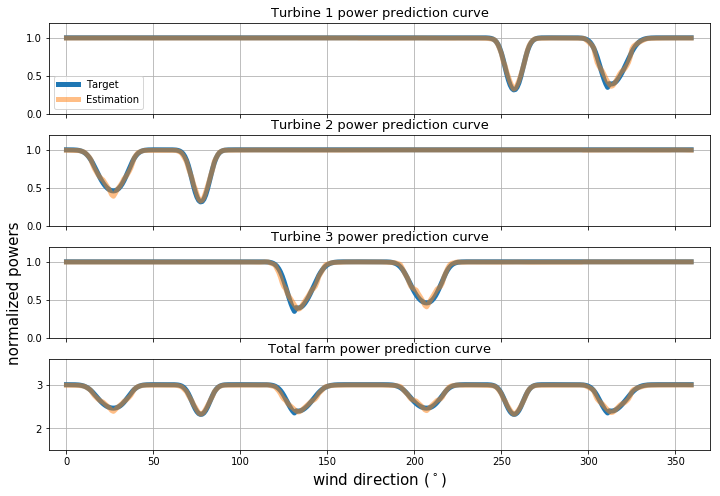

In [9]:
num_turbines = wind_farm_man.num_turbine
wind_speed= 10.0
use_speed = True
test_direction(gnn=gnn_load,
               farm=wind_farm_man,
               num_turbines=num_turbines,
               wind_speed=wind_speed,
               use_speed=use_speed)

In [10]:
# nt = 10
# wind_farm_man.sample_wind_farm(num_turbine=nt)
# wind_farm_man.update_wind_farm_graph(180.0, 12.0)
# wind_farm_man.visualize_wind_farm()

Number of turbines : 3
Number of speeds : 30
[wind direction = 60] : 0.082275390625 sec
test score : 0.008379287086427212
[wind direction = 120] : 0.08575820922851562 sec
test score : 0.005918219685554504
[wind direction = 180] : 0.10352754592895508 sec
test score : 0.012027371674776077


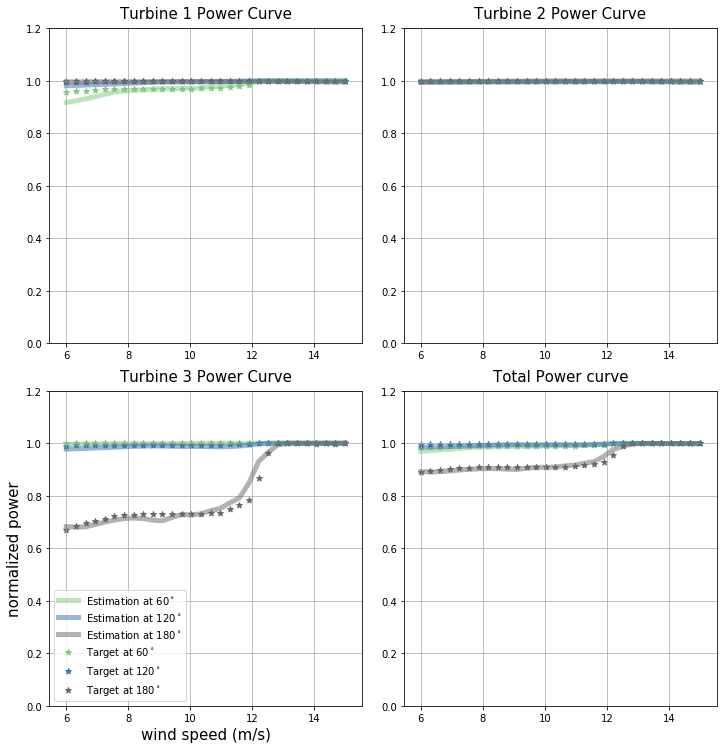

In [11]:
wind_speeds = np.linspace(6.0, 15.0, 30)
wind_directions = [60,120,180]
num_turbines = wind_farm_man.num_turbine

test_speed(gnn_load, 
           wind_farm_man,
           num_turbines, 
           wind_speeds=wind_speeds,
           wind_directions=wind_directions, n_col=2,
           fix_farm=False)

In [12]:
wind_speed = np.linspace(8.0, 15.0, 20)
wind_directions = np.linspace(0, 360, 20)

In [13]:
# test_speed_direction(gnn_load, wind_farm_man, num_turbines=5, save_path='5turbines',
#                      wind_speed=wind_speed, wind_directions=wind_directions)

In [14]:
num_turbines = np.arange(5, 40).tolist()
mean, stds = test_turbine_numbers(gnn_load, wind_farm_man, num_turbines)

[0/35] Comutping 5 case 
[1/35] Comutping 6 case 
[2/35] Comutping 7 case 
[3/35] Comutping 8 case 
[4/35] Comutping 9 case 
[5/35] Comutping 10 case 
[6/35] Comutping 11 case 
[7/35] Comutping 12 case 
[8/35] Comutping 13 case 
[9/35] Comutping 14 case 


KeyboardInterrupt: 

In [ ]:
upper = np.array(mean) + np.array(stds)
lower = np.array(mean) - np.array(stds)

In [ ]:
num_turbines = np.arange(40, 45).tolist()
mean2, stds2 = test_turbine_numbers(gnn_load, wind_farm_man, num_turbines)

In [ ]:
upper2 = np.array(mean2) + np.array(stds2)
lower2 = np.array(mean2) - np.array(stds2)

In [ ]:
means = mean + mean2
uppers = upper.tolist() + upper2.tolist()
lowers = lower.tolist() + lower2.tolist()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
num_turbines = np.arange(5, 45).tolist()

fig, ax = plt.subplots(figsize=(10,5), dpi=300)
ax.fill_between(num_turbines, uppers, lowers, color='antiquewhite', alpha=0.5, label='+/- 1 std')
ax.plot(num_turbines, means, '-', label='Observed Values')
ax.legend(loc='upper left')
plt.show()